<a href="https://colab.research.google.com/github/NsiriRoua/NLP_Classification/blob/main/Sentiment_Analyses_from_a_tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP: Real or Not? NLP with Disaster Tweets
## AI Open Sessions 



### Our goal is to build a model able to predict if a tweet really concern a disaster or it does not

### 1) Load the dataset from Kaggle

First we install kaggle 

In [ ]:
!pip install -q kaggle

We need to get the api from kaggle website <br>
To get your API :
go to [Kaggle.com](https://www.kaggle.com/) --> my account (top right click on the profile pic) --> scroll down to "create API token" <br>
Then we upload the json file to colab

In [ ]:
from google.colab import files
uploaded = files.upload() #upload the .json file to the colab

Saving tweets.csv to tweets.csv


Next, we download the data using these commands

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json /root/.kaggle
!kaggle competitions download -c nlp-getting-started

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


### 2) Load the librairies and the dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/tweets.csv')

Let's have a look at our data

In [ ]:
df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [ ]:
df.tail()

,id,keyword,location,text,target
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


In [ ]:
df.shape

(11370, 5)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(11370, 5)

In [ ]:
df.isnull().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [ ]:
df.target.value_counts()

0    9256
1    2114
Name: target, dtype: int64

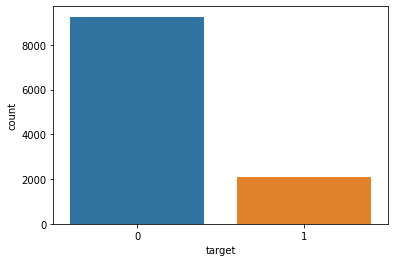

In [ ]:
sns.countplot(x=df.target)

Some investigation on 'keyword' and 'location'

In [ ]:
print('Number of unique keywords : ', df.keyword.nunique())

Number of unique keywords :  219


In [ ]:
df.keyword.value_counts()

thunderstorm     93
flattened        88
mass%20murder    86
stretcher        86
drown            83
                 ..
electrocuted     16
rainstorm        11
deluged          10
siren            10
tsunami           6
Name: keyword, Length: 219, dtype: int64

In [ ]:
print('Number of unique locations :' , df.location.nunique())

Number of unique locations : 4504


In [ ]:
df.location.value_counts()

United States        96
Australia            83
London, England      81
UK                   77
India                74
                     ..
🇵🇭 | 🇰🇷               1
Over the seas         1
関東                    1
Riverside, CA         1
Kilkenny, Ireland     1
Name: location, Length: 4504, dtype: int64

#### Dealing with Categorical missing values : 


1.   Delete whole column
2.   Delete rows with missing values
3.   Replace with the most frequent values
4.   Apply a Classification Algorithm (Supervised)
5.   Apply a Clustering Algorithm  (Unsupervised)


We will go with the lazy method.<br>
We will delete the 'location' column, an delete rows with null keyword value

In [ ]:
df.drop('location',axis = 1 , inplace=  True)
df.dropna(inplace=True)

In [ ]:
df.shape

(11370, 4)

In [ ]:
df.isnull().sum()

id         0
keyword    0
text       0
target     0
dtype: int64

In [ ]:
df.head()

,id,keyword,text,target
0,0,ablaze,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,"""Lord Jesus, your love brings freedom and pard...",0


A good habit, is to reset index after dropping some rows

In [ ]:
df.reset_index(drop=True, inplace=True)

Check the Target column

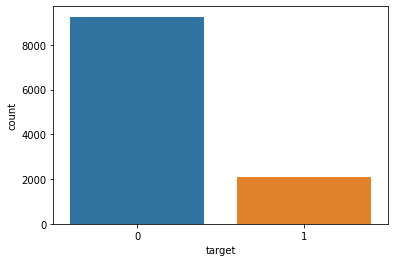

In [ ]:
sns.countplot(data = df, x='target')

### 3) NLP Preprocessing

The NLP wokflow is different, we will go step by step here <br>
We will define functions that we can use later

First we will import libraries that we will need

In [ ]:
import nltk #Text processing library Natural Language ToolKit
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#### 1) Change all the text to lower case

In [ ]:
def Lower (text):
  return text.lower()

In [ ]:
Lower('Barra MAMSTEK')

'barra mamstek'

#### 2) Word Tokenisation : Basically, tokenisation is the process of breaking a stream of text up into words , for example : "This is a text" => 'This' , 'is' , 'a' ,'text'

In [ ]:
def Tokenisation (text):
  return nltk.word_tokenize(text)

In [ ]:
# Let's test it :
test = Tokenisation(Lower('Hello there. Hello! are you ? this super notebook is about nlp. I am eating food'))

In [ ]:
test

['hello',
 'there',
 '.',
 'hello',
 '!',
 'are',
 'you',
 '?',
 'this',
 'super',
 'notebook',
 'is',
 'about',
 'nlp',
 '.',
 'i',
 'am',
 'eating',
 'food']

#### 3) Remove Stop Words and Non Alpha Text : Nltk provides as with some stop words so here we define a function that returns as a list with those words and othersfrom our business understanding

In [ ]:
#Create a list of stopwords 
Stpwrd_List=stopwords.words('english')

In [ ]:
Stpwrd_List

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def StopWordsAlphaText(tokenized_text):
  filtred_text=[]
  for word in tokenized_text:
  #strip punctuation
    word = word.strip('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
    #check if the word starts with an alphabet
    val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", word)
    #ignore if it is a stop word or val is none
    if((word not in Stpwrd_List) and (val is not None)):
      filtred_text.append(word)
  return filtred_text

In [ ]:
StopWordsAlphaText(test)

['hello', 'hello', 'super', 'notebook', 'nlp', 'eating', 'food']

In [ ]:
test = StopWordsAlphaText(test)

### 4) a-  Word Lemmatization : it's the process during wich we reduce the inflected words properly ensuring that the root word belongs to the language. <br> A little explanation : we use somethong called "pos_tagger", this tool is used to identify the nature of the word given. We do this process to provide the word's nature to the lemmatizer to obtain the best result possible


In [ ]:
from nltk.corpus import wordnet

In [ ]:
tag_dict = {"J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}

In [ ]:
nltk.pos_tag(['door','eating','properly','good'])

[('door', 'NN'), ('eating', 'VBG'), ('properly', 'RB'), ('good', 'JJ')]

In [ ]:
nltk.pos_tag(['door','eating'])[0][1][0]

'N'

In [ ]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
get_wordnet_pos('great')

'a'

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def Lemmetizer(tokens):
  lemmetized_text=[]
  for word in tokens:
    word = lemmatizer.lemmatize(word, get_wordnet_pos(word))
    lemmetized_text.append(word)
  return lemmetized_text

In [ ]:
Lemmetizer(test)

['hello', 'hello', 'super', 'notebook', 'nlp', 'eat', 'food']

### 4) b- Stemming is the process of reducing inflected words to their word stem, base or root form

In [ ]:
PosStem = PorterStemmer ()

In [ ]:
def Stemmer (tokens):
  stemmed_text=[]
  for word in tokens :
    word = PosStem.stem(word)
    stemmed_text.append(word)
  return stemmed_text

In [ ]:
Stemmer(Tokenisation(Lower('Hello Mothers going! are your kids?')))

['hello', 'mother', 'go', '!', 'are', 'your', 'kid', '?']

In [ ]:
df.text = df.text.apply(Lower)

In [ ]:
df.text = df.text.apply(Tokenisation)

In [ ]:
df.text = df.text.apply(StopWordsAlphaText)

In [ ]:
df.text = df.text.apply(Lemmetizer)

In [ ]:
df.head()

,id,keyword,text,target
0,0,ablaze,"[communal, violence, bhainsa, telangana, stone...",1
1,1,ablaze,"[telangana, section, impose, bhainsa, january,...",1
2,2,ablaze,"[arsonist, set, car, ablaze, dealership, http]",1
3,3,ablaze,"[arsonist, set, car, ablaze, dealership, http,...",1
4,4,ablaze,"[lord, jesus, love, brings, freedom, pardon, f...",0


### Wordcloud and word count

In [ ]:
real=""
fake=""
for index,row in df.iterrows(): #iterrows() returns two values 1. index of row 2. row values  ['text' (name of column)]
  text = " ".join(row["text"])
  if(row["target"]==1):
    real=real+" "+text
  else:
    fake=fake+" "+text

In [ ]:
fake

' lord jesus love brings freedom pardon fill holy spirit set heart ablaze http child chinese tweet would go viral social medium would ablaze snl would make racist national security minister kan dapaah side chic set internet ablaze late powerful http creature soul longer clarent blue ablaze thing carry memory memory http social medium go banana chuba hubbard announce monday even plan return okstate http amen set whole system ablaze man http rengoku set heart miss style color c http paulzizkaphoto rundle ablaze wish good even http http thankfultuesday isaiah pas water pas http walk fire scorch set ablaze warm greeting occasion lohri winter pass may everyone woe trouble set ablaze kind true sadly swear jam set world ablaze love completely crazy fuck dream ripped like torn jean http term demon burning dark ruin people use magic interact without harm http heartfelt appreciation prime minister yab tun dr wife yabhg tun dr siti hasmah mohd ali http give u everything horrible foot infection wo

In [ ]:
#Create a real_tweets wordcloud
wordcloud_real=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(real)
#Create a real_tweets wordcloud
wordcloud_fake=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(fake)

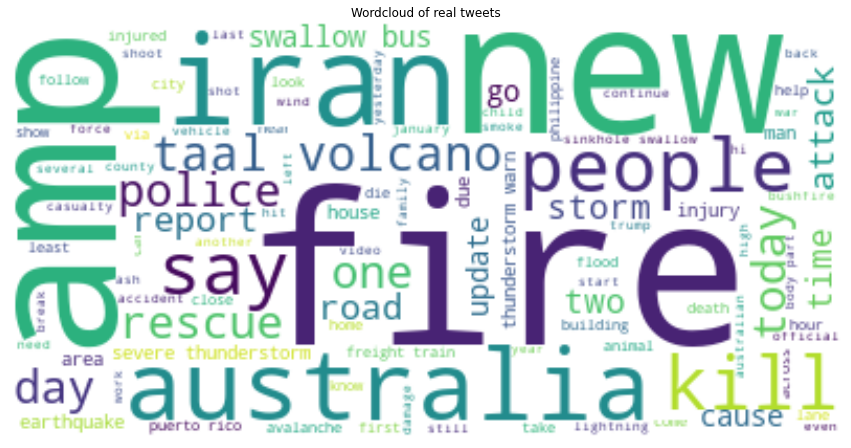

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of real tweets")
plt.show()

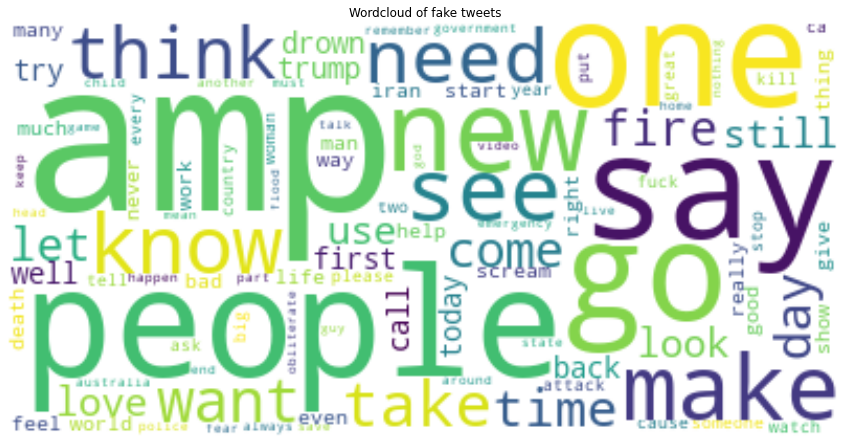

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of fake tweets")
plt.show()

The next steps need a string format (not a list), that is why, we have to join all the words in a single sentence 

In [ ]:
df.text = df.text.apply(lambda x: " ".join(x))

In [ ]:
df.head(3)

,id,keyword,text,target
0,0,ablaze,communal violence bhainsa telangana stone pelt...,1
1,1,ablaze,telangana section impose bhainsa january clash...,1
2,2,ablaze,arsonist set car ablaze dealership http,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#### First seperate features from target, then train/test split

In [ ]:
X = df.drop(['target','id'],axis = 1)
y = df.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

#### We need to take care of the categorical data, so we will use an ordinal encode

In [ ]:
df.text[0]

'communal violence bhainsa telangana stone pelt muslim house house vehicle set'

#### We will try CountVectorizer() provided by SKlearn to get our document-term matrix (n_samples,n_features) 

<img src="https://raw.githubusercontent.com/cassieview/intro-nlp-wine-reviews/master/imgs/vectorchart.PNG" alt="drawing" width="600"/>

In [ ]:
count_vect = CountVectorizer() #ngram_range=(1,2) 1. this,is,good ==> 2. (1.+) this is, is good

In [ ]:
#Let's see what it does exactly
Example = [ 'this is the first line.',
           'this line is the second line.',
           'and this is the third.',
           'is this the fifth line?']

In [ ]:
Vect_Cv = count_vect.fit_transform(Example)

In [ ]:
count_vect.get_feature_names()

['and', 'fifth', 'first', 'is', 'line', 'second', 'the', 'third', 'this']

In [ ]:
Vect_Cv #using sparse matrix to optimize the usage of memory expl 9 bytes to 5 bytes ( do not give memory cases to 0, only store >0 values)

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
Vect_Cv.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 2, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 0, 1, 0, 1]])

### Term ferquency - Inverse document frequency : <br> Reduce the weightage of more common words like (the, is, an etc.) which occur in all document. <br> Wiki : TF_IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

<img src="https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png" alt="drawing" width="500"/><img src="https://miro.medium.com/max/876/1*_OsV8gO2cjy9qcFhrtCdiw.jpeg" alt="drawing" width="455"/>


In [ ]:
Tfidf = TfidfTransformer()

In [ ]:
Vect_Tfidf = Tfidf.fit_transform(Vect_Cv)

In [ ]:
Vect_Tfidf

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
#Let's see what it does exactly
Example = [ 'this is the first line.',
           'this line is the second line.',
           'and this is the third.',
           'is this the fifth line?']

In [ ]:
count_vect.get_feature_names()

['and', 'fifth', 'first', 'is', 'line', 'second', 'the', 'third', 'this']

In [ ]:
Vect_Tfidf.toarray()

array([[0.        , 0.        , 0.67049706, 0.34989318, 0.42796959,
        0.        , 0.34989318, 0.        , 0.34989318],
       [0.        , 0.        , 0.        , 0.28108867, 0.6876236 ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.59581303, 0.        , 0.        , 0.31091996, 0.        ,
        0.        , 0.31091996, 0.59581303, 0.31091996],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.42796959,
        0.        , 0.34989318, 0.        , 0.34989318]])

#### These two functions are already combined in another one called 'TfidfVectorizer'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer()
tfvect.fit_transform(Example).toarray()

array([[0.        , 0.        , 0.67049706, 0.34989318, 0.42796959,
        0.        , 0.34989318, 0.        , 0.34989318],
       [0.        , 0.        , 0.        , 0.28108867, 0.6876236 ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.59581303, 0.        , 0.        , 0.31091996, 0.        ,
        0.        , 0.31091996, 0.59581303, 0.31091996],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.42796959,
        0.        , 0.34989318, 0.        , 0.34989318]])

### Now to the pipeline

First we create a list with sperated feature types

We create the text feature pipeline

In [ ]:
text_transformer = Pipeline([
    ('CountVectorizer', CountVectorizer()),
    ('TfidfTransformer',TfidfTransformer())
          ])

In [ ]:
Preprocessing = ColumnTransformer([
    ("text features", text_transformer, 'text'),
    ('categorical_features', OrdinalEncoder(),['keyword'])
                                   ])

In case we have many features, we can put them on a list like this : <br>


```
Numerical_features = ['num1','num2']
categorical_features = ['cat1','cat2']
```



In [ ]:
X_train = Preprocessing.fit_transform(x_train)

### Choosing our model
![Image](https://miro.medium.com/max/1400/1*tpOZa-wju9pD-5vFd-Es-g.png)

### A quick explanation about the Bayes Theorem.<br>
#### Bayes theorem is a famous equation that allows us to make predictions based on data. Here is the classic version of the Bayes theorem:
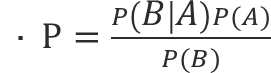
<br>
so, if we want to apply it to our data, it will be in this form : 
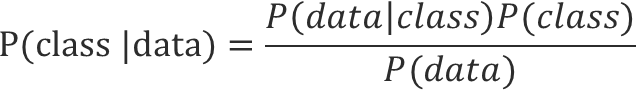

For the varieties that we will use, we have : 

*   **Gaussian Naive Bayes :** It uses the previous equation . Because of the assumption of the normal distribution, Gaussian Naive Bayes is best used in cases when all our features are continuous.
*   **Bernoulli Naive Bayes :** The Bernoulli naive Bayes classifier assumes that all our features are binary such that they take only two values
*   **Multinomial Naive Bayes :** Multinomial naive Bayes works similar to Gaussian naive Bayes, however the features are assumed to be multinomially distributed. In practice, this means that this classifier is commonly used when we have discrete data 





In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import time

In [ ]:
names = ["Gaussian Naive Bayes", "Multinomial Naive Bayes","Bernoulli Naive Bayes"]#,"Decision Tree", "Random Forest" ]

In [ ]:
classifiers = [GaussianNB([0.2,0.8]),
               MultinomialNB(),
               BernoulliNB(),
               #DecisionTreeClassifier(),
               #RandomForestClassifier()
               ]
               # the last two take a lot of time because they are not based on probability, work with 13779 feature xDD

In [ ]:
X_train

<9096x13779 sparse matrix of type '<class 'numpy.float64'>'
	with 91338 stored elements in Compressed Sparse Row format>

In [ ]:
for name, clf in zip(names, classifiers):
  #Cross validation prediction, and we measure fitting time 
  start = time.time()
  preds = cross_val_predict(clf,X_train.toarray(),y_train,cv=5)
  end = time.time()
  #Metrics
  acc = accuracy_score(y_train,preds)
  precision = precision_score(y_train,preds)
  recall = recall_score(y_train,preds)
  f1 = f1_score(y_train,preds)
  cm = confusion_matrix(y_train,preds)
  #Printing results
  print (name, 'Accuracy  :  ', "%.2f" %(acc*100),'%', ', Precision',"%.3f" %precision, 'Recall :' , "%.3f" %recall ,'F1-Score : ',"%.3f" %f1)
  print('The confusion Matrix : ' )
  print(cm)
  #Now we check how long did it take
  print('Time used :', "%.3f" %(end - start), 'seconds')
  print(' *-----------------------------------------------------------------------------------------------------*')

Gaussian Naive Bayes Accuracy  :   74.97 % , Precision 0.396 Recall : 0.622 F1-Score :  0.484
The confusion Matrix : 
[[5750 1628]
 [ 649 1069]]
Time used : 8.378 seconds
 *-----------------------------------------------------------------------------------------------------*
Multinomial Naive Bayes Accuracy  :   81.34 % , Precision 0.534 Recall : 0.097 F1-Score :  0.164
The confusion Matrix : 
[[7233  145]
 [1552  166]]
Time used : 2.820 seconds
 *-----------------------------------------------------------------------------------------------------*
Bernoulli Naive Bayes Accuracy  :   86.51 % , Precision 0.783 Recall : 0.396 F1-Score :  0.526
The confusion Matrix : 
[[7189  189]
 [1038  680]]
Time used : 5.907 seconds
 *-----------------------------------------------------------------------------------------------------*


Let's move to a gridsearch, to look for optimals parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

Now we define our parameters that we want to test. <br>
you ca always check [Sklearn website](https://scikit-learn.org/) to see the model parameters

In [ ]:
Grid_par = [
            {'alpha' : [0,0.5,1,1.5], 'fit_prior' : [True, False], 'class_prior': [[0.2, 0.8],[0.15,0.85]]}
            ]
model = BernoulliNB()

In [ ]:
Grid_par = [
            {'priors' : [0.1, 0.9], 'var_smoothing' : [1e-9, 2e-9]}
            ]
model = GaussianNB()

In [ ]:
Grid_par = [
            {'alpha' : [0,0.5,1,1.5], 'fit_prior': [True, False], 'class_prior': [[0.2, 0.8]]}
            ]
model = MultinomialNB()

In [ ]:
GridSearch = GridSearchCV(estimator= model , param_grid=Grid_par, cv = 5,
                         scoring='f1', return_train_score=True)

In [ ]:
GridSearch.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.5, 1, 1.5],
                          'class_prior': [[0.2, 0.8], [0.15, 0.85]],
                          'fit_prior': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1', verbose=0)

In [ ]:
results = GridSearch.cv_results_

In [ ]:
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print ("%.3f" %(mean_score*100),'% f1_score | Parameters : ',params) 

53.596 % f1_score | Parameters :  {'alpha': 0, 'class_prior': [0.2, 0.8], 'fit_prior': True}
53.596 % f1_score | Parameters :  {'alpha': 0, 'class_prior': [0.2, 0.8], 'fit_prior': False}
52.775 % f1_score | Parameters :  {'alpha': 0, 'class_prior': [0.15, 0.85], 'fit_prior': True}
52.775 % f1_score | Parameters :  {'alpha': 0, 'class_prior': [0.15, 0.85], 'fit_prior': False}
59.919 % f1_score | Parameters :  {'alpha': 0.5, 'class_prior': [0.2, 0.8], 'fit_prior': True}
59.919 % f1_score | Parameters :  {'alpha': 0.5, 'class_prior': [0.2, 0.8], 'fit_prior': False}
59.146 % f1_score | Parameters :  {'alpha': 0.5, 'class_prior': [0.15, 0.85], 'fit_prior': True}
59.146 % f1_score | Parameters :  {'alpha': 0.5, 'class_prior': [0.15, 0.85], 'fit_prior': False}
60.469 % f1_score | Parameters :  {'alpha': 1, 'class_prior': [0.2, 0.8], 'fit_prior': True}
60.469 % f1_score | Parameters :  {'alpha': 1, 'class_prior': [0.2, 0.8], 'fit_prior': False}
60.773 % f1_score | Parameters :  {'alpha': 1, 'c

In [ ]:
GridSearch.best_estimator_

BernoulliNB(alpha=1, binarize=0.0, class_prior=[0.15, 0.85], fit_prior=True)

In [ ]:
final_model = GridSearch.best_estimator_

In [ ]:
final_model

BernoulliNB(alpha=1, binarize=0.0, class_prior=[0.15, 0.85], fit_prior=True)

Create our final pipeline, including the model

In [ ]:
Final_Pipeline = Pipeline([
     ('Preprocessing', Preprocessing),
     ('clf', final_model)
])

In [ ]:
Final_Pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('Preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('text features',
                                                  Pipeline(memory=None,
                                                           steps=[('CountVectorizer',
                                                                   CountVectorizer(analyzer='word',
                                                                                   binary=False,
                                                                                   decode_error='strict',
                                                                                   dtype=<class 'numpy.int64'>,
                                                                                   encoding='utf-8',
                   

### Now we move to the testing phase
#### We can directly apply our pipeline, to predict the test dataset

In [ ]:
x_test

,keyword,text
3495,demolished,many illegal building demolish city guadalajar...
5461,fatality,fatality tho
9794,sunk,onthisday chinese state medium confirm iranian...
11105,windstorm,luck miss windstorm either side fly safe xxx
1803,buildings%20on%20fire,inferno black friday death building much fuel ...
...,...,...
5221,eyewitness,plp leader call pm hypocrite campaign finance ...
10163,thunderstorm,sleep open window take full advantage beautifu...
637,attacked,son teenage girl arrest couple attack centurio...
7181,loud%20bang,brother get bathroom heard loud bang follow owwww


In [ ]:
Preds = Final_Pipeline.predict(x_test)

In the end, we measure our accuracy

In [ ]:
print('Final model accuracy : ', "%.3f" %(accuracy_score(y_test,Preds)*100), '%')

Final model accuracy :  89.358 %


## Saving a model for future use


In [ ]:
import pickle 

In [ ]:
  # Save the trained model as a pickle string. 
saved_model = pickle.dumps(Final_Pipeline) 

In [ ]:
# Load the pickled model 
my_model = pickle.loads(saved_model) 


In [ ]:
  # Use the loaded pickled model to make predictions 
Load_preds = my_model.predict(x_test) 
print('Final model accuracy : ', "%.3f" %(accuracy_score(y_test,Load_preds)*100), '%')

Final model accuracy :  89.358 %
